# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

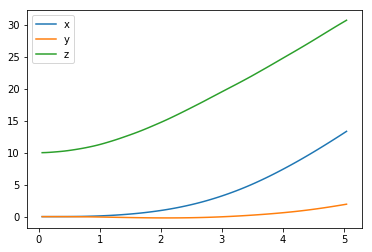

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

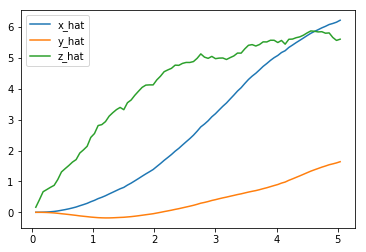

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

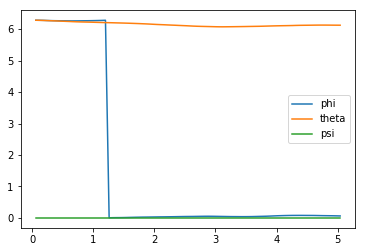

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

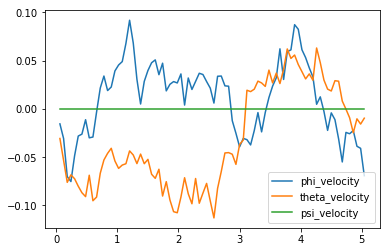

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

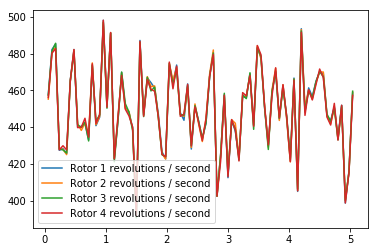

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[13.34221022  1.94498056 30.72293388  0.06259343  6.12514092  0.        ]
[6.22006996 1.63848646 5.60660592]
[-0.06914155 -0.00960108  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

#num_episodes = 1000
# this is a temp param to speed up. TODO: move back
num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   10, score =  -1.042 (best =  -1.037), noise_scale = 0.0255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.ddpg_agent import DDPG
from task_improved_reward import TaskImprovedReward

#num_episodes = 300
num_episodes = 300
init_pose = np.array([0.0, 0.0, 200.0, 0.0, 0.0, 0.0]) 
init_velocities = np.array([0.0, 0.0, 0.0])
init_angle_velocities = np.array([0.0, 0.0, 0.0])

runtime = 5
target_pos = np.array([0.0, 0.0, 210.0]) 

task = TaskImprovedReward(target_pos=target_pos, init_pose=init_pose, 
            init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime)
agent = DDPG(task) 

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']

rewards = []

best_total_reward = float("-inf")

last_num_episodes = 10
last_results_wrapper = []

for i_episode in range(1, num_episodes+1):
    results = {x: [] for x in labels}
    state = agent.reset_episode()
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) \
            + list(action) + [reward]
        
        #print("Episode={}, step={}, min_reward={}, max_reward={}, reward={}".format(i_episode, task.step_num, task.min_reward, task.max_reward, reward))
        
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            total_reward = np.sum(results['reward'])
            average_reward = np.mean(results['reward'])
            best_total_reward = max(best_total_reward, total_reward)
            
            print("\rEpisode={}, steps done={} ... Avg Reward = {:7.3f}, Total Reward={:7.3f}, Best Total Reward={:7.3f}, task.sim.pose[:3]={}, task.sim.time={}".format(
                i_episode, task.step_num, average_reward, total_reward, best_total_reward, np.array(task.sim.pose[:3]).astype(int), np.array(task.sim.time).astype(int)), end="") 
            #, end=""
            
            rewards.append(np.mean(results['reward']))       
            break
        
    sys.stdout.flush()

    if i_episode > num_episodes - last_num_episodes:
        last_results_wrapper.append(results)
    
print("\r\rlast results mean reward:")    
for last_results in last_results_wrapper:
    print(np.mean(last_results['reward']))


C:\Programs\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


min_reward_boundary=-1300.0, max_reward_boundary=-0.0
Episode=1, steps done=252 ... Avg Reward =   1.549, Total Reward=130.143, Best Total Reward=130.143, task.sim.pose[:3]=[ -9 -78  77], task.sim.time=5 collision! 
 collision! 
Episode=3, steps done=252 ... Avg Reward =   1.577, Total Reward=132.507, Best Total Reward=132.507, task.sim.pose[:3]=[-11  -2  67], task.sim.time=5time=4 success! 
 success! 
 success! 
 success! 
Episode=4, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.307, Best Total Reward=400100.307, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=5, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.304, Best Total Reward=400100.307, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=6, steps done=114 ... Avg Reward = 10529.032, Total Reward=400103.214, Best Total Reward=400103.214, task.sim.pose[:3]=[  1   2 205], task.sim.time=2 success! 
 s

Episode=86, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.320, Best Total Reward=400103.214, task.sim.pose[:3]=[ -1   0 205], task.sim.time=2 success! 
 success! 
 success! 
Episode=87, steps done=111 ... Avg Reward = 8110.846, Total Reward=300101.291, Best Total Reward=400103.214, task.sim.pose[:3]=[  0  -1 205], task.sim.time=2 success! 
 success! 
Episode=88, steps done=108 ... Avg Reward = 5558.316, Total Reward=200099.362, Best Total Reward=400103.214, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=89, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.311, Best Total Reward=400103.214, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=100, steps done=252 ... Avg Reward =   1.861, Total Reward=156.313, Best Total Reward=400103.214, task.sim.pose[:3]=[-1 29 84], task.sim.time=5=5ime=2 collision! 
 collision! 
Episode=102, steps done=252 ... Avg Reward 

Episode=144, steps done=111 ... Avg Reward = 8110.846, Total Reward=300101.288, Best Total Reward=400103.230, task.sim.pose[:3]=[  1   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=145, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.314, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=146, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.311, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
Episode=147, steps done=111 ... Avg Reward = 8110.845, Total Reward=300101.280, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   1 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=148, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.318, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success!

Episode=184, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.310, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=185, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.315, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=186, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.309, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=187, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.315, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=188, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.316, Best Total Reward=400103.230, task.sim.pose[:3]=[ -1   0 205], task.sim.time=2 success! 
 success! 
 succes

Episode=224, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.307, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
Episode=225, steps done=111 ... Avg Reward = 5408.169, Total Reward=200102.250, Best Total Reward=400103.230, task.sim.pose[:3]=[ -2   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=226, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.314, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=227, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.312, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=228, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.305, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=

Episode=292, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.319, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=293, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.313, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
Episode=294, steps done=111 ... Avg Reward = 5408.169, Total Reward=200102.246, Best Total Reward=400103.230, task.sim.pose[:3]=[  1   1 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=295, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.311, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=296, steps done=111 ... Avg Reward = 10813.522, Total Reward=400100.310, Best Total Reward=400103.230, task.sim.pose[:3]=[  0   0 205], task.sim.time=2 success! 
 success! 
 success! 
 success! 
Episode=

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

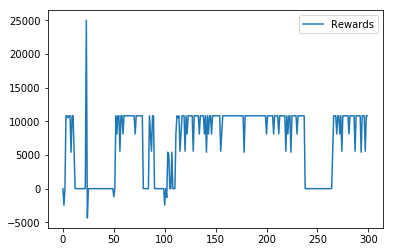

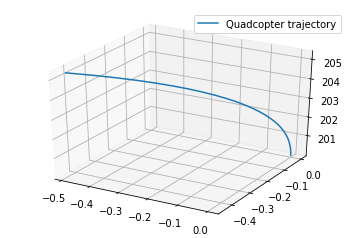

In [11]:
## TODO: Plot the rewards.
fig, ax = plt.subplots()
ax.plot(rewards, label='Rewards')
plt.legend()
plt.show()

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
x = results['x']
y = results['y']
z = results['z']
ax.plot(x, y, z, label='Quadcopter trajectory')
ax.legend()



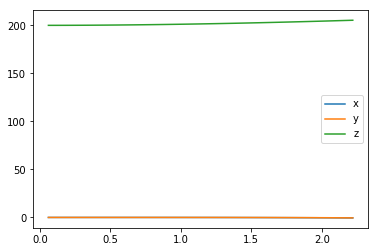

In [12]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

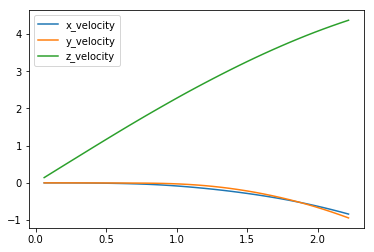

In [13]:
plt.plot(results['time'], results['x_velocity'], label='x_velocity')
plt.plot(results['time'], results['y_velocity'], label='y_velocity')
plt.plot(results['time'], results['z_velocity'], label='z_velocity')
plt.legend()
_ = plt.ylim()

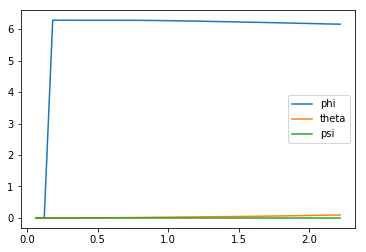

In [14]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

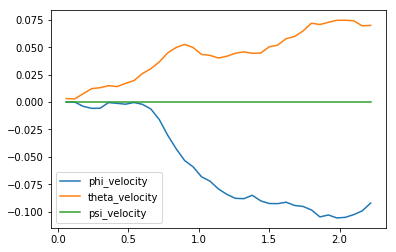

In [15]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

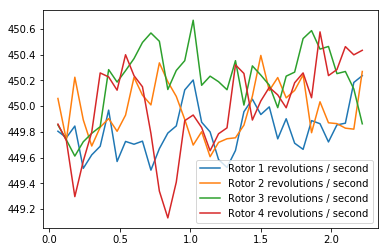

In [16]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I specified the goal for a quadcopter to gain a few meters of altitude. The target point was a few meters higher (Z axis) than the initial point with the same X and Y.<br>
My first versions of the reward function were very complex. They included reward for time passed - the more time elapsed, the better, penalty for the distance to the target, penalty for the x,y,z velocities, Euler velocities, Euler acceleration.
But it didn't work. <br>
Then I put the projections of the distance to axes X, Y and Z, and put more penalty to Z-distance. <br>
Then I added the normalization to [-1; 1] using "tanh()" in order to the neural networks better learn the gradients.<br>
It neither worked. Then I replaced "tanh()" with linear normalization, plus using the function numpy.clip().<br>
What really helped was specifying a success and failure (collision) criteria:<br>
- The success criteria was Z-distance less than 5 and absolute Z-velocity less than 10. In case of success a very big reward was given and the episode was forcedly finished.<br>
- The failure criteria was having episode done while passed time is less than the maximum allowed episode time (runtime), meaning that the quadcopter hit the allowed boundary (one of 6 cube's planes). In case of failure a very big negative reward was given.<br>
Thanks to Fernando W., the mentor from Udacity Student Hub, who provided useful hints:
[https://github.com/WittmannF/quadcopter-best-practices/blob/master/README.md]

The rest of reward function - all that didn't fit into success and failure conditions - was also simplified: only Z-distance and Z-velocity was taken into account.<br>

Here is the final look of the reward function:

In [17]:
#some of the parameters are not used any more. 
def get_abs_reward(time, distance_x, distance_y, distance_z, velocity_z, euler_velocities, euler_accels):
    reward = - 3.5 * distance_z - 5 * abs(velocity_z)
    
    return reward

class TaskImprovedReward():

    # all other class methods are skipped
    
    def get_reward(self):
        """Uses current pose of sim to return reward."""

        distance_x = abs(self.sim.pose[0] - self.target_pos[0])
        distance_y = abs(self.sim.pose[1] - self.target_pos[1])
        distance_z = abs(self.sim.pose[2] - self.target_pos[2])
        
        euler_velocities = np.max(self.sim.angular_v)
        euler_accels = np.max(self.sim.angular_accels)
        time = self.sim.time
        
        velocity_x = self.sim.v[0]
        velocity_y = self.sim.v[1]
        velocity_z = self.sim.v[2]
        
        reward = 0
        if self.sim.done and self.sim.time < self.sim.runtime and not self.success:
            reward_norm = -100000
        elif distance_z < 5 and abs(velocity_z) < 10:
            reward_norm = 100000
            self.sim.done = True
            self.success = True
        else:
            reward = get_abs_reward(time, distance_x, distance_y, distance_z, velocity_z, euler_velocities, euler_accels)
            
            # just in case we made an error in estimating the min/max boundaries
            reward = np.clip(reward, self.min_reward_boundary, self.max_reward_boundary)
            
            # normalizing to [-1; 1]
            reward_norm = ((reward - self.min_reward_boundary)/(self.max_reward_boundary - self.min_reward_boundary) - 0.5 )*2
        
        return reward_norm


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I took the concept of Deep Deterministic Policy Gradients (DDPG) proposed in this project.<br>
Also I tried to increase the number of layers, the number of units in the layers, and didn't succeed. Since this is a reinforcement learning task, the dataset was different each time, it was very difficult to catch any dependencies after these changes, also these exercises consumed a lot of CPU time, so I moved back to the original DDPG configuration.
- The hyperparameters were: $\gamma$ = 0.99, $\tau$ = 0.01, $\mu$ = 0, $\theta$ = 0.15, $\sigma$ = 0.2. Decreasing the $\gamma$ (discount factor) didn't help. Neither helped the increasing of $\theta$ and $\sigma$ - the quadcopter's trajectory became a zigzag, but it didn't help to learn any better.
- In the DDPG model the Actor consisted of 3 Dense hidden layers with sizes 32, 64, 32 respectfully, Sigmoid activation function at the exit, Adam optimizer with 10 times decreased learning rate = 0.0001 versus its default value.<br>
The Critic contained 2 networks, each with 2 Dense hidden layers, 32 and 64 units. Each hidden layer had ReLU activation function. Then these 2 networks were combined with ReLU activation function. Again, Adam optimizer was used with default learning rate.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- It was a hard task for the agent to learn, the learning process was not stable, there was a lot of randomness in it.
- It was rather a spontaneous catch up to get a decent reward value.
- The final performance of the agent (last 10 episodes, see above in the code) was good enough: it provides the numbers ~5000, ~10000, ~15000 per step.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- The hardest part of the project was to start from scratch, having only scatered pieces of code (DDPG agent) and no clue how to proceed. The next difficult thing was specifying the task and consequent reward function. I would say this was the key point in the whole project.
- One interesting thing I found is that reinforcement learning process has a lot of uncertainity, a lot of volatility, it is very fragile. Resulting in much bigger efforts to solve RL tasks. This is in comparison with the previous Machine learning chapters.